<a href="https://colab.research.google.com/github/Mega-737/Amigo-Secreto-Challenge-/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


## Calcular o *Faturamento total de cada Loja*.                               Somando os valores da coluna Preço de cada loja para estimar o faturamento.

In [20]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Carregando dados diretamente do repositório no GitHub
url_base = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/"

loja_1 = pd.read_csv(url_base + "loja_1.csv")
loja_2 = pd.read_csv(url_base + "loja_2.csv")
loja_3 = pd.read_csv(url_base + "loja_3.csv")
loja_4 = pd.read_csv(url_base + "loja_4.csv")

In [21]:
# Lista com os DataFrames e nomes
lojas = [loja_1, loja_2, loja_3, loja_4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criando o DataFrame com faturamento e valor formatado
df_faturamento = pd.DataFrame({
    'Loja': nomes,
    'Faturamento': [df['Preço'].sum() for df in lojas]
})

# Formatando como moeda R$
df_faturamento['Faturamento (R$)'] = df_faturamento['Faturamento'].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)


In [22]:
# Exibindo apenas com valor formatado
df_faturamento[['Loja', 'Faturamento (R$)']]

,Loja,Faturamento (R$)
0,Loja 1,"R$ 1.534.509,12"
1,Loja 2,"R$ 1.488.459,06"
2,Loja 3,"R$ 1.464.025,03"
3,Loja 4,"R$ 1.384.497,58"


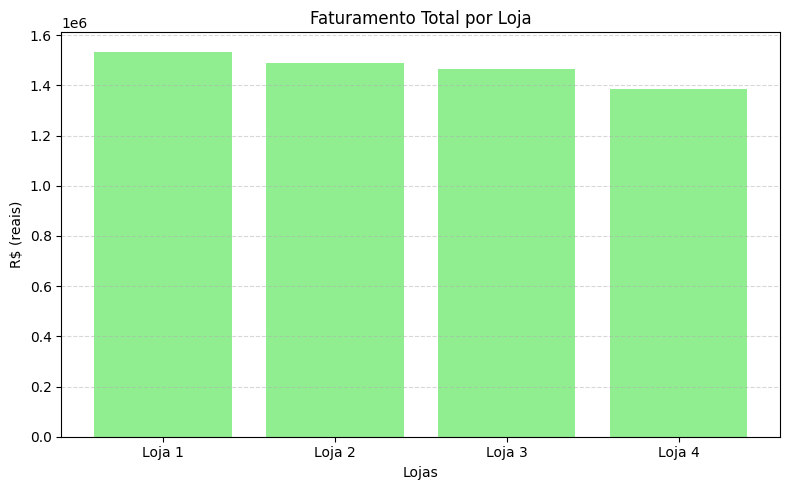

In [25]:
# Visualizando com gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='lightgreen')
plt.title('Faturamento Total por Loja')
plt.ylabel('R$ (reais)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria

> Adicionar aspas




## Calcular a quantidade de produtos vendidos por categoria em cada loja.      A ideia é agrupar os dados por categoria e contar o número de vendas de     cada  tipo, mostrando as categoria mais populares de cada loja.

In [28]:
# Vendas por categoria por loja
import matplotlib.pyplot as plt

# Lista de DataFrames e nomes das lojas
lojas = [loja_1, loja_2, loja_3, loja_4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

In [29]:
# Armazena os DataFrames de contagem por loja
categorias_lojas = []

for i, loja in enumerate(lojas):
    df_categoria = loja['Categoria do Produto'].value_counts().reset_index()
    df_categoria.columns = ['Categoria', 'Quantidade Vendida']
    df_categoria['Loja'] = nomes[i]
    categorias_lojas.append(df_categoria)

In [30]:
# Juntando todos em um único DataFrame
df_categorias_vendas = pd.concat(categorias_lojas, ignore_index=True)

# Exibindo as 5 primeiras linhas
df_categorias_vendas.head()

,Categoria,Quantidade Vendida,Loja
0,moveis,465,Loja 1
1,eletronicos,448,Loja 1
2,brinquedos,324,Loja 1
3,eletrodomesticos,312,Loja 1
4,esporte e lazer,284,Loja 1


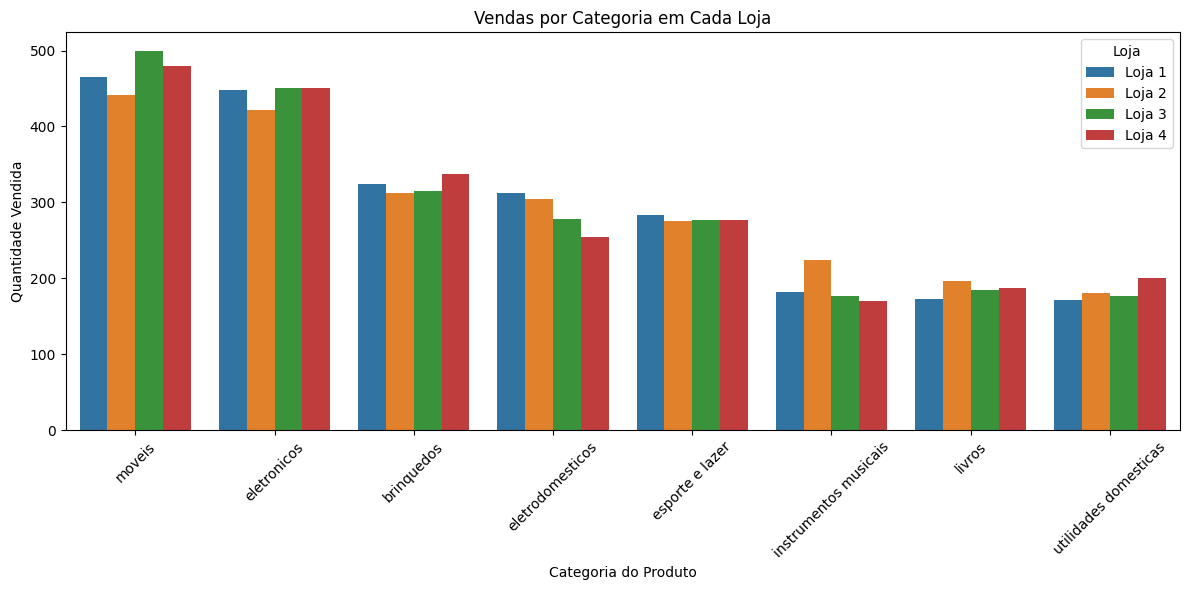

In [31]:
import seaborn as sns

# Gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_categorias_vendas, x='Categoria', y='Quantidade Vendida', hue='Loja')
plt.title('Vendas por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

# Calcular a média da coluna Avaliação da compra para cada loja                e assim entender o nível de satisfação dos clientes.

In [32]:
# Lista com os DataFrames e nomes das lojas
lojas = [loja_1, loja_2, loja_3, loja_4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Calculando a média das avaliações por loja
medias_avaliacoes = [df['Avaliação da compra'].mean() for df in lojas]

In [35]:
# Criando o DataFrame
df_avaliacoes = pd.DataFrame({
    'Loja': nomes,
    'Média de Avaliação': medias_avaliacoes
})

In [36]:
# Exibindo as médias com duas casas decimais
df_avaliacoes['Média de Avaliação'] = df_avaliacoes['Média de Avaliação'].round(2)

# Exibindo o DataFrame
df_avaliacoes

,Loja,Média de Avaliação
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


/tmp/ipython-input-38-3080989951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avaliacoes, x='Loja', y='Média de Avaliação', palette='pastel')


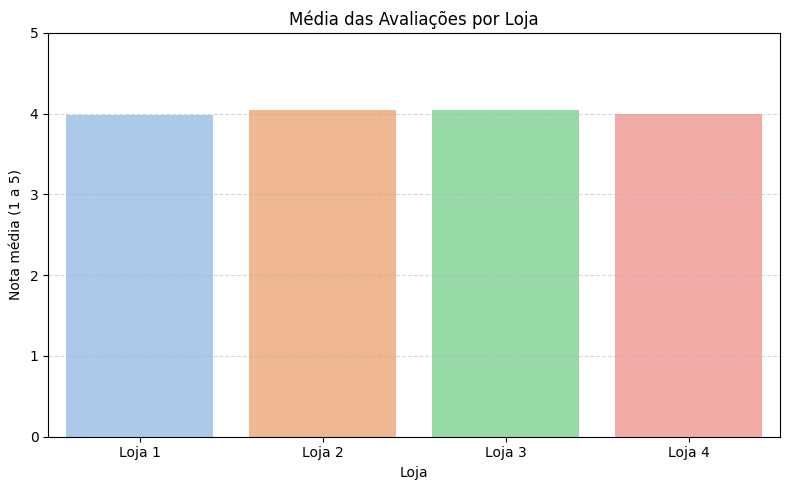

In [38]:
# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=df_avaliacoes, x='Loja', y='Média de Avaliação', palette='pastel')
plt.title('Média das Avaliações por Loja')
plt.ylabel('Nota média (1 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

## Identificar quais produtos tiveram maior e menor volume de vendas em       cada loja e apresentar visualmente os destaques.

In [43]:
# Lista com DataFrames e nomes
lojas = [loja_1, loja_2, loja_3, loja_4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Armazenar os resultados
produtos_destaque = []

for i, loja in enumerate(lojas):
    contagem = loja['Produto'].value_counts()

    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()

    produtos_destaque.append({
        'Loja': nomes[i],
        'Produto Mais Vendido': mais_vendido,
        'Qtd Mais Vendido': contagem.max(),
        'Produto Menos Vendido': menos_vendido,
        'Qtd Menos Vendido': contagem.min()
    })


In [44]:
# Criando o DataFrame final
df_destaques = pd.DataFrame(produtos_destaque)

# Exibindo o resultado
df_destaques

,Loja,Produto Mais Vendido,Qtd Mais Vendido,Produto Menos Vendido,Qtd Menos Vendido
0,Loja 1,Micro-ondas,60,Headset,33
1,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,Loja 3,Kit banquetas,57,Blocos de montar,35
3,Loja 4,Cama box,62,Guitarra,33


In [39]:
# Lista com os DataFrames e nomes das lojas
lojas = [loja_1, loja_2, loja_3, loja_4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Calculando o frete médio
fretes_medios = [df['Frete'].mean() for df in lojas]


In [40]:
# Criando o DataFrame
df_frete = pd.DataFrame({
    'Loja': nomes,
    'Frete Médio': fretes_medios
})

In [41]:
# Formatando em R$ com 2 casas decimais e separador brasileiro
df_frete['Frete Médio (R$)'] = df_frete['Frete Médio'].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

In [42]:
# Exibindo o resultado
df_frete[['Loja', 'Frete Médio (R$)']]

,Loja,Frete Médio (R$)
0,Loja 1,"R$ 34,69"
1,Loja 2,"R$ 33,62"
2,Loja 3,"R$ 33,07"
3,Loja 4,"R$ 31,28"


# 5. Frete Médio por Loja
